In [ ]:
# ✅ STEP 1. YOLOv8 설치 및 모델 불러오기
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultral

In [ ]:
 # 학습된 YOLOv8 모델 로드
model = YOLO('/content/best (4).pt')  # 또는 너의 경로에 맞게 수정

In [ ]:
# ✅ STEP 2. 추론할 비디오 업로드
from google.colab import files
uploaded = files.upload()  # 비디오 업로드
video_name = list(uploaded.keys())[0]
video_path = f"/content/{video_name}"

Saving new_video.mp4 to new_video.mp4


In [ ]:
# ✅ STEP 3. YOLOv8 추론 실행 (결과를 txt로 저장)
# ✅ 정확한 추론 실행 코드
results = model.predict(
    source="/content/new_video.mp4",
    save=True,
    save_txt=True,
    save_conf=True,
    conf=0.4,  # 너무 높지 않게
    project="runs/detect",
    name="yolov8_out",
    exist_ok=True
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/4658) /content/new_video.mp4: 288x512 (no detections), 63.6ms
video 1/1 (frame 2/4658) /content/new_video.mp4: 288x512 1 Wallpaper_damage, 10.1ms
video 1/1 (frame 3/4658) /content/new_video.mp4: 288x512 (no detections), 10.2ms
video 1/1 (frame 4/4658) /content/new_video.mp4: 288x512 (no detections), 10.2ms
video 1/1 (frame 5/4658) /content/new_video.mp4: 288x512 1 Wallpaper_damage, 9.7ms
video 1/1 (frame 6/4658) /content/new_video.mp

In [ ]:
import os
import cv2

input_folder = 'runs/detect/yolov8_out/labels'
output_txt = '/content/yolov8_mot.txt'
video_path = '/content/new_video.mp4'

# 영상 사이즈 얻기
cap = cv2.VideoCapture(video_path)
ret, sample = cap.read()
height, width = sample.shape[:2]
cap.release()

# 프레임 번호 추출 함수
def get_frame_number(filename):
    try:
        return int(filename.split('_')[-1].split('.')[0])
    except:
        return -1

# MOT 포맷 변환 시작
with open(output_txt, 'w') as out_f:
    for fname in sorted(os.listdir(input_folder), key=get_frame_number):
        frame = get_frame_number(fname)
        if frame < 0:
            continue

        with open(os.path.join(input_folder, fname), 'r') as f:
            for line in f:
                cls, x, y, w, h, conf = map(float, line.strip().split())

                # ✅ 정규화된 좌표 → 픽셀 좌표로 변환
                x *= width
                y *= height
                w *= width
                h *= height

                x1 = x - w / 2
                y1 = y - h / 2

                out_f.write(f"{frame+1},-1,{x1:.2f},{y1:.2f},{w:.2f},{h:.2f},{conf:.4f},-1,-1,-1\n")

print("✅ 픽셀 좌표로 변환 완료: yolov8_mot.txt")


✅ 픽셀 좌표로 변환 완료: yolov8_mot.txt


In [ ]:
!rm -rf ByteTrack
!git clone https://github.com/ifzhang/ByteTrack.git
%cd ByteTrack

# NumPy 호환성 수정
!sed -i 's/np.float/float/g' ByteTrack/yolox/tracker/matching.py
!sed -i 's/np.float/float/g' ByteTrack/yolox/tracker/byte_tracker.py

# 의존성 설치
!pip install -q -r requirements.txt
!python3 setup.py develop


Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007 (from 1)
Receiving objects: 100% (2007/2007), 79.60 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
/content/ByteTrack
sed: can't read ByteTrack/yolox/tracker/matching.py: No such file or directory
sed: can't read ByteTrack/yolox/tracker/byte_tracker.py: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 119.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement onnxruntime==1.8.0 (from versions: 1.15.0, 1.15.1, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1

In [ ]:
%%writefile tools/demo_custom.py
import cv2
import numpy as np
import os

# MOT format: frame, id, x1, y1, w, h, conf, -1, -1, -1
txt_path = "/content/yolov8_mot.txt"
video_path = "/content/new_video.mp4"
output_path = "result_yolov8_byte.mp4"

# Load detections by frame
detections = {}
with open(txt_path, "r") as f:
    for line in f.readlines():
        frame, _, x, y, w, h, conf, *_ = map(float, line.strip().split(","))
        frame = int(frame)
        if frame not in detections:
            detections[frame] = []
        detections[frame].append([x, y, w, h, conf])

# Video input/output
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (w, h))

frame_id = 1
while True:
    ret, frame = cap.read()
    if not ret:
        break
    dets = detections.get(frame_id, [])
    for det in dets:
        x, y, w_box, h_box, conf = det
        pt1 = (int(x), int(y))
        pt2 = (int(x + w_box), int(y + h_box))
        cv2.rectangle(frame, pt1, pt2, (0, 255, 0), 2)
        cv2.putText(frame, f"{conf:.2f}", (pt1[0], pt1[1] - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    out.write(frame)
    frame_id += 1

cap.release()
out.release()
print(f"✅ 추적 결과 저장 완료: {output_path}")


Writing tools/demo_custom.py


In [ ]:
!python3 tools/demo_custom.py

✅ 추적 결과 저장 완료: result_yolov8_byte.mp4


In [ ]:
import os

video_path = "result_yolov8_byte.mp4"

print("📁 존재 여부:", os.path.exists(video_path))
if os.path.exists(video_path):
    print("📦 파일 크기:", os.path.getsize(video_path), "bytes")


📁 존재 여부: True
📦 파일 크기: 113126378 bytes


✅ 총 프레임 수: 4658


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

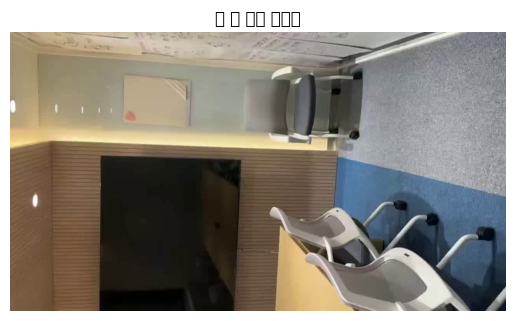

In [ ]:
import cv2

cap = cv2.VideoCapture("result_yolov8_byte.mp4")

if not cap.isOpened():
    print("❌ 비디오 파일 열기 실패")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("✅ 총 프레임 수:", total_frames)

    ret, frame = cap.read()
    if ret:
        from matplotlib import pyplot as plt
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("🔍 첫 번째 프레임")
        plt.axis("off")
        plt.show()
    else:
        print("❌ 프레임 읽기 실패")

cap.release()


In [ ]:
# ✅ 비디오 재인코딩 (용량 최적화)
!ffmpeg -i result_yolov8_byte.mp4 -vcodec libx264 -crf 28 result_yolov8_byte_small.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

with open("result_yolov8_byte_small.mp4", "rb") as f:
    mp4 = f.read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=640 controls><source src="{data_url}" type="video/mp4">')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 🔧 np.float 문제 강제 해결 스크립트
import os

def patch_np_float(root="/content/ByteTrack"):
    modified_files = []
    for dirpath, _, filenames in os.walk(root):
        for fname in filenames:
            if fname.endswith(".py"):
                full_path = os.path.join(dirpath, fname)
                with open(full_path, "r") as f:
                    content = f.read()
                if "np.float" in content:
                    content = content.replace("np.float", "float")
                    with open(full_path, "w") as f:
                        f.write(content)
                    modified_files.append(full_path)

    if modified_files:
        print("✅ 패치된 파일 목록:")
        for f in modified_files:
            print(f" - {f}")
    else:
        print("🎉 모든 파일에서 np.float 제거 완료 (더 이상 없어요!)")

patch_np_float()

✅ 패치된 파일 목록:
 - /content/ByteTrack/tutorials/cstrack/byte_tracker.py
 - /content/ByteTrack/tutorials/cstrack/tracker.py
 - /content/ByteTrack/tutorials/ctracker/test.py
 - /content/ByteTrack/tutorials/ctracker/test_byte.py
 - /content/ByteTrack/tutorials/ctracker/byte_tracker.py
 - /content/ByteTrack/tutorials/ctracker/mot_online/matching.py
 - /content/ByteTrack/tutorials/jde/byte_tracker.py
 - /content/ByteTrack/tutorials/jde/tracker.py
 - /content/ByteTrack/tutorials/centertrack/byte_tracker.py
 - /content/ByteTrack/tutorials/centertrack/tracker.py
 - /content/ByteTrack/tutorials/centertrack/mot_online/matching.py
 - /content/ByteTrack/tutorials/qdtrack/tracker_reid_motion.py
 - /content/ByteTrack/tutorials/qdtrack/byte_tracker.py
 - /content/ByteTrack/tutorials/qdtrack/qdtrack.py
 - /content/ByteTrack/tutorials/qdtrack/mot_online/matching.py
 - /content/ByteTrack/tutorials/trades/byte_tracker.py
 - /content/ByteTrack/tutorials/trades/tracker.py
 - /content/ByteTrack/tutorials/trade

In [ ]:
!sed -i 's/float32/np.float32/g' /content/ByteTrack/yolox/utils/visualize.py

In [ ]:
!pip install -q loguru
!pip install -q cython_bbox
!pip install -q lap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.3 MB/s eta 0:00:00


In [ ]:
import os
import re
import cv2
import numpy as np
from ByteTrack.yolox.tracker.byte_tracker import BYTETracker

def calc_iou(boxA, boxB):
    # box = [x1,y1,x2,y2]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    areaB = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    return inter / (areaA + areaB - inter + 1e-6)

def convert_yolo_to_mot_with_class(video_path, label_folder, out_txt):
    """
    YOLOv8 .txt 레이블( cls, x,y,w,h,conf ) →
    MOT 포맷 with class: frame,cls,x1,y1,w_pix,h_pix,conf
    """
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError(f"비디오를 열 수 없습니다: {video_path}")
    H, W = frame.shape[:2]
    cap.release()

    # 파일명에서 프레임 번호만 뽑아서 정렬
    files = sorted(
        os.listdir(label_folder),
        key=lambda fn: int(re.findall(r'(\d+)', fn)[-1])
    )

    with open(out_txt, 'w') as f:
        for fn in files:
            m = re.search(r'(\d+)\.txt$', fn)
            if not m:
                continue
            frame_id = int(m.group(1))
            path = os.path.join(label_folder, fn)
            with open(path) as lf:
                for line in lf:
                    cls, x, y, w_, h_, conf = map(float, line.strip().split())
                    # normalized → pixel
                    x1 = (x - w_/2) * W
                    y1 = (y - h_/2) * H
                    w_pix = w_ * W
                    h_pix = h_ * H
                    f.write(f"{frame_id},{int(cls)},{x1:.2f},{y1:.2f},"
                            f"{w_pix:.2f},{h_pix:.2f},{conf:.2f}\n")
    print("✅ MOT-with-class 변환 완료:", out_txt)


def track_and_log_class_center(
    video_path, mot_txt, out_vid, out_csv,
    buffer_frames=300, hist_thresh=0.5, iou_thresh=0.3,
    pixel_thresh=50, vel_thresh=20
):
    """
    mot_txt: frame,cls,x1,y1,w,h,conf
    """
    # ─ ByteTrack 세팅 ─────────────────
    class TArgs:
        track_thresh        = 0.2
        track_buffer        = buffer_frames
        match_thresh        = 0.3
        aspect_ratio_thresh = 1.6
        min_box_area        = 10
        mot20               = False
    tracker = BYTETracker(TArgs(), frame_rate=30)

    # ─ 비디오 준비 ────────────────────
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    W  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    H  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    vw = cv2.VideoWriter(
        out_vid,
        cv2.VideoWriter_fourcc(*'mp4v'),
        fps, (W, H)
    )

    # ─ MOT-with-class 읽기 ────────────
    dets = {}  # frame_id → [(cls,x1,y1,w,h)]
    with open(mot_txt) as f:
        for L in f:
            fid, cls, x1, y1, w_, h_, _ = L.strip().split(',')[:7]
            fid, cls = int(fid), int(cls)
            x1, y1, w_, h_ = map(float, (x1, y1, w_, h_))
            dets.setdefault(fid, []).append((cls, x1, y1, w_, h_))

    # ─ Persistent ID 세팅 ─────────────
    persistent_map  = {}  # internal_track_id → persistent_id
    persistent_data = {}  # persistent_id → {'class','hist','box','vel','last_seen'}
    next_pid = 1

    logs = []
    frame_id = 1

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        arr = dets.get(frame_id, [])
        feats = (np.array([[x1, y1, x1+w_, y1+h_, 1.0]
                           for (_,x1,y1,w_,h_) in arr], dtype=float)
                 if arr else np.zeros((0,5), dtype=float))

        online = tracker.update(feats, [H, W], (H, W))

        for t in online:
            itid = t.track_id
            x1, y1, w_, h_ = map(int, t.tlwh)
            x2, y2 = x1 + w_, y1 + h_
            cx, cy = (x1 + x2)/2, (y1 + y2)/2

            # ─ 클래스 결정 ────────────────
            cls_ = -1
            if arr:
                centers = [((xx1 + xxw/2), (yy1 + yyh/2))
                           for (cc, xx1, yy1, xxw, yyh) in arr]
                d2s     = [(cx-cx2)**2 + (cy-cy2)**2 for cx2,cy2 in centers]
                idx     = int(np.argmin(d2s))
                cls_    = arr[idx][0]

            # ─ Spatial / Velocity Gate ───────────
            chosen_pid, min_d2 = None, float('inf')
            for pid, info in persistent_data.items():
                if info['class'] != cls_:
                    continue
                bx1,by1,bx2,by2 = info['box']
                pcx,pcy        = (bx1+bx2)/2, (by1+by2)/2
                d2 = (cx-pcx)**2 + (cy-pcy)**2
                if d2 < min_d2:
                    min_d2, chosen_pid = d2, pid

            if chosen_pid is not None and np.sqrt(min_d2) < pixel_thresh:
                prev = persistent_data[chosen_pid]
                dt   = frame_id - prev['last_seen']
                pred_cx = (prev['box'][0] + prev['vel'][0]*dt
                         + prev['box'][2] + prev['vel'][0]*dt)/2
                pred_cy = (prev['box'][1] + prev['vel'][1]*dt
                         + prev['box'][3] + prev['vel'][1]*dt)/2
                if abs(cx-pred_cx) < vel_thresh and abs(cy-pred_cy) < vel_thresh:
                    pid = chosen_pid
                    persistent_map[itid] = pid
                else:
                    chosen_pid = None

            # ─ Histogram / IoU Re-ID ─────────────
            if chosen_pid is None:
                if itid not in persistent_map:
                    # 히스토그램
                    roi  = frame[y1:y2, x1:x2]
                    hist = cv2.normalize(
                        cv2.calcHist([roi],[0,1,2],None,[8,8,8],[0,256]*3),
                        None
                    ).flatten()
                    # 히스토 후보
                    bid, best_h = None, 1.0
                    for pid,info in persistent_data.items():
                        if info['class'] != cls_: continue
                        d = cv2.compareHist(info['hist'], hist,
                                            cv2.HISTCMP_BHATTACHARYYA)
                        if d < best_h:
                            best_h, bid = d, pid
                    # IoU 후보
                    cid, best_i = None, 0.0
                    box = [x1,y1,x2,y2]
                    for pid,info in persistent_data.items():
                        if info['class'] != cls_: continue
                        iou = calc_iou(box, info['box'])
                        if iou > best_i:
                            best_i, cid = iou, pid
                    # 최종 결정
                    if bid is not None and best_h < hist_thresh:
                        pid = bid
                    elif cid is not None and best_i > iou_thresh:
                        pid = cid
                    else:
                        pid = next_pid
                        next_pid += 1
                    persistent_map[itid] = pid
                else:
                    pid = persistent_map[itid]
            else:
                pid = chosen_pid

            # ─ persistent_data 업데이트 ──────────
            prev = persistent_data.get(pid)
            vx = x1 - prev['box'][0] if prev else 0
            vy = y1 - prev['box'][1] if prev else 0
            roi  = frame[y1:y2, x1:x2]
            hist = cv2.normalize(
                cv2.calcHist([roi],[0,1,2],None,[8,8,8],[0,256]*3),
                None
            ).flatten()
            persistent_data[pid] = {
                'class'    : cls_,
                'hist'     : hist,
                'box'      : [x1,y1,x2,y2],
                'vel'      : [vx,vy],
                'last_seen': frame_id
            }

            # ─ 그리기 & 로그 ────────────────
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,255), 2)
            cv2.putText(frame, f"ID:{pid} C:{cls_}",
                        (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2)
            logs.append((frame_id, pid, cls_, cx, cy))

        # ─ Stale PID 정리 ───────────────
        stale = [pid for pid,info in persistent_data.items()
                 if frame_id - info['last_seen'] > buffer_frames*5]
        for pid in stale:
            del persistent_data[pid]

        vw.write(frame)
        frame_id += 1

    cap.release()
    vw.release()

    # ─ CSV 저장 ─────────────────────────
    with open(out_csv, 'w') as f:
        f.write("frame,track_id,class,center_x,center_y\n")
        for fr, tid, cls, cx, cy in logs:
            f.write(f"{fr},{tid},{cls},{cx:.1f},{cy:.1f}\n")

    print("✅ 결과 영상:", out_vid)
    print("✅ 로그 CSV:", out_csv)


if __name__ == "__main__":
    video_path   = "/content/new_video.mp4"
    label_folder = "/content/runs/detect/yolov8_out/labels"
    mot_txt      = "/content/yolov8_mot_cls.txt"
    out_vid      = "/content/result_with_cls.mp4"
    out_csv      = "/content/tracking_with_cls.csv"

    # 1) YOLOv8 레이블 → MOT-with-class 변환
    convert_yolo_to_mot_with_class(video_path, label_folder, mot_txt)

    # 2) ByteTrack + Re-ID → 영상/CSV 출력
    track_and_log_class_center(
        video_path, mot_txt, out_vid, out_csv,
        buffer_frames=300,
        hist_thresh=0.5,
        iou_thresh=0.3,
        pixel_thresh=50,
        vel_thresh=20
    )

✅ MOT-with-class 변환 완료: /content/yolov8_mot_cls.txt
✅ 결과 영상: /content/result_with_cls.mp4
✅ 로그 CSV: /content/tracking_with_cls.csv


In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = '/content/result_with_cls.mp4'

# 영상 파일 읽어서 base64로 인코딩
mp4 = open(video_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
import os

print("📁 파일 존재 여부:", os.path.exists('/content/result_with_cls.mp4'))

📁 파일 존재 여부: True


In [ ]:
from google.colab import files
files.download('/content/result_with_cls.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/tracking_with_cls.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!head /content/yolov8_mot_cls.txt

1,0,39.59,409.20,107.40,48.36,1,0,-1,-1
2,0,170.63,67.33,107.99,42.48,1,0,-1,-1
3,1,344.52,219.92,93.31,71.69,1,1,-1,-1
4,0,244.92,292.11,100.19,40.52,1,0,-1,-1
5,0,61.34,496.51,105.75,41.77,1,0,-1,-1
6,0,622.97,42.13,657.03,675.61,1,0,-1,-1
7,1,455.42,290.69,65.53,54.68,1,1,-1,-1
8,1,448.28,543.10,70.79,55.09,1,1,-1,-1
9,0,412.30,91.46,125.36,161.60,1,0,-1,-1
10,0,428.81,226.89,119.19,158.00,1,0,-1,-1
